In [1]:
#Import packages
#---------------------------------------
import sys
import os
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import matplotlib
import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning) 

#Import your modules
#---------------------------------------
import admin_functions as adfn
import network_mod as net_fn

# Define paths
#----------------------------------------------------------------------
Fcode = '/Users/dominicburrows/Dropbox/PhD/Analysis/my_scripts/GitHub/'
Fdata = '/Users/dominicburrows/Dropbox/PhD/analysis/Project/'
Fdoc = '/Users/dominicburrows/Documents/'
F10t = '/Volumes/Dominic 10tb/' 
F10t2 = '/Volumes/Dominic 10tb2/'
Ftm = '/Volumes/Dominic Time Machine/'
Ffig = '/Users/dominicburrows/Dropbox/PhD/figures/'

%load_ext autoreload
sys.version

'3.7.4 (default, Aug 13 2019, 15:17:50) \n[Clang 4.0.1 (tags/RELEASE_401/final)]'

In [2]:
#Define network parameters from model fits

#baseline fit - all params
#----------------------------
bln_k = 7
bln_vth = 20
bln_r = 5

#preseizure fit - all params
#----------------------------
pre_k = 6
pre_vth = 16
pre_r = 0

#seizure fit - all params
#----------------------------
sz_k = 31
sz_vth = 17
sz_r = 1

#only k fit
#----------------------------
o_k = 30
o_vth = 16
o_r = 0

#only vth fit
#----------------------------
ov_k = 6
ov_vth = 15
ov_r = 0

#only r fit
#----------------------------
or_k = 6
or_vth = 16
or_r = 7



# Dynamic range

In [2]:
on_list = np.arange(5, 500, 10)
on_list

array([  5,  15,  25,  35,  45,  55,  65,  75,  85,  95, 105, 115, 125,
       135, 145, 155, 165, 175, 185, 195, 205, 215, 225, 235, 245, 255,
       265, 275, 285, 295, 305, 315, 325, 335, 345, 355, 365, 375, 385,
       395, 405, 415, 425, 435, 445, 455, 465, 475, 485, 495])

In [ ]:
datalist = list(range(6))
klist, vthlist, rlist = [bln_k, pre_k, sz_k, o_k, ov_k, or_k],[bln_vth, pre_vth, sz_vth, o_vth, ov_vth, or_vth],[bln_r, pre_r, sz_r, o_r, ov_r, or_r]
for e in range(6):
    curr_list = list(range(50))
    for i in range(50):
        dyn_r, out = dr_loop(klist[e], vthlist[e], rlist[e], on_list)
        curr_list[i] = dyn_r,out
        
    datalist[e] = curr_list
    print('Done ' + str(e))
np.save(savepath + 'model_dynrange.npy', datalist)

In [3]:
import glob
os.chdir(Fdata + 'PTZ-WILDTYPE')
data_list = sorted(glob.glob('model_dynrange.*'))
data_list

['model_dynrange.npy']

In [120]:
np.load(data_list[0], allow_pickle=True)[0].shape

(6, 50, 2)

In [4]:
# Node coordinates
#---------------------------------------------------------------------------
os.chdir(Fdata + 'PTZ-WILDTYPE')
bln = np.load(data_list[0], allow_pickle=True)[0]
sz = np.load(data_list[0], allow_pickle=True)[2]


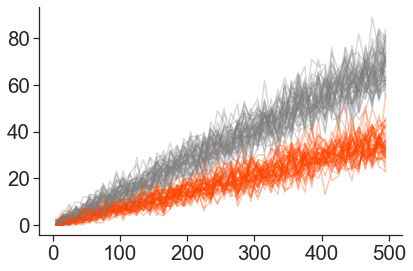

In [123]:
#3
from sklearn.linear_model import LinearRegression
from matplotlib import cm

#colors = cm.Spectral_r(np.linspace(0, 1, len(choose)))

fig, axarr = plt.subplots(figsize = (6.5,4.2))

for i in range(50):
    
    plt.plot(on_list,bln[i][1], c='grey', alpha = 0.3)
    plt.plot(on_list,sz[i][1], c='orangered', alpha = 0.3)

#axarr.set_xscale('log')
axarr.spines['top'].set_visible(False)
axarr.spines['right'].set_visible(False)
plt.yticks(size = 20.5)
plt.xticks(size = 20.5, visible=True)
plt.tick_params(axis = "x", which = "both", bottom = True)
plt.tick_params(axis = "y", which = "both", left = True)
#plt.savefig(Ffig + 'dynrange_comp.svg', transparent = True)
plt.show()

In [5]:
import pandas as pd

dr = list(range(250))
cond = list(range(250))

cond_list = ['BLN', 'PRE', 'GEN', 'K', 'VTH', 'R']
count=0
data = np.load(data_list[0], allow_pickle=True)
for i in range(len(data)):
    if i != 1:
        for x in range(len(data[i])):
            dr[count] = data[i][x][0][0]
            cond[count] = cond_list[i]
            count+=1
dr_df = pd.DataFrame({"Dynamic range":dr , "condition": cond})

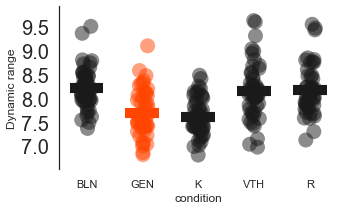

In [7]:
import seaborn as sns
from matplotlib.collections import PathCollection
from matplotlib import cm
sns.set(style="white")
colors = ['k', 'orangered', 'k', 'k']
fig, ax = plt.subplots(figsize = (5,3))
ax = sns.pointplot(x="condition", y="Dynamic range", data = dr_df, hue = 'condition', palette = colors, join=False, ci=0, scale=5, markers='_')
for artist in ax.lines:
    artist.set_zorder(10)
for artist in ax.findobj(PathCollection):
    artist.set_zorder(11)
ax = sns.stripplot(x="condition", y="Dynamic range", data = dr_df, hue = 'condition', palette = colors, size = 15, jitter = True ,alpha = 0.5)

plt.yticks(size = 20)
points = ax.collections
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
#ax.spines['left'].set_visible(False)

#ax.set_xlabel(' ', size = '13')
#ax.set_ylabel('σ', size = '15')
#ax.set_xticklabels(['Baseline', 'Ictal'], size = 15)
ax.legend_.remove()
#plt.ylim(0.5,1.3)
#plt.savefig(Ffig + 'DR_compare_mod.svg', transparent = True)

plt.show()

In [18]:
adfn.mean_std('VTH', dr_df[dr_df['condition']== 'VTH']['Dynamic range'])

VTH mean = 8.15239828608055  , std = 0.08235136989869425


In [74]:
k_list = np.arange(6, 30)
k_list

array([ 6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
       23, 24, 25, 26, 27, 28, 29])

In [89]:
prac = sorted(glob.glob('*krange*dynrange*'))
#curr = np.load(prac[0])
prac

['model_krange-06_dynrange.npy',
 'model_krange-07_dynrange.npy',
 'model_krange-08_dynrange.npy',
 'model_krange-09_dynrange.npy',
 'model_krange-10_dynrange.npy',
 'model_krange-11_dynrange.npy',
 'model_krange-12_dynrange.npy',
 'model_krange-13_dynrange.npy',
 'model_krange-14_dynrange.npy',
 'model_krange-15_dynrange.npy',
 'model_krange-16_dynrange.npy',
 'model_krange-17_dynrange.npy',
 'model_krange-18_dynrange.npy',
 'model_krange-19_dynrange.npy',
 'model_krange-20_dynrange.npy',
 'model_krange-21_dynrange.npy',
 'model_krange-22_dynrange.npy',
 'model_krange-23_dynrange.npy',
 'model_krange-24_dynrange.npy',
 'model_krange-25_dynrange.npy',
 'model_krange-26_dynrange.npy',
 'model_krange-27_dynrange.npy',
 'model_krange-28_dynrange.npy',
 'model_krange-29_dynrange.npy',
 'model_krange-30_dynrange.npy']

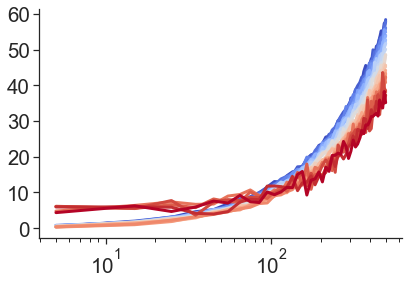

In [90]:
fig, axarr = plt.subplots(figsize = (6.5,4.2))  

axarr.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
colors  = cm.coolwarm(np.linspace(0,1,len(prac)))

for x in range(len(prac)):
    out = np.zeros((50,50))

    for i in range(50):
        out[i] = np.load(prac[x], allow_pickle=True)[i][1]
    out_mean = np.mean(out,axis=0)
    plt.plot(on_list, out_mean, c=colors[x], alpha = 1, linewidth = 3)
    
axarr.set_xscale('log')

axarr.spines['top'].set_visible(False)
axarr.spines['right'].set_visible(False)
plt.yticks(size = 20.5)
plt.xticks(size = 20.5, visible=True)
plt.tick_params(axis = "x", which = "both", bottom = True)
plt.tick_params(axis = "y", which = "both", left = True)
#plt.savefig(Ffig + 'dynrange_k.svg', transparent = True)
plt.show()

In [75]:
plot_me = list(range(len(k_list)))
for e in range(len(k_list)):
    plot_vec = []
    for i in range(50):
        plot_vec = np.append(plot_vec, np.load(prac[e], allow_pickle=True)[i][0][0])
    plot_me[e] = plot_vec

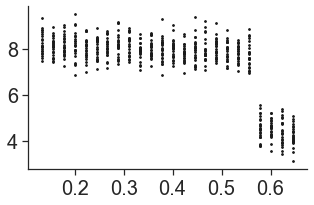

In [76]:
fig, axarr = plt.subplots(figsize = (5,3))
comb_k = []
comb_dr = []
for e in range(len(k_list)):
    plt.scatter(k_vals,np.array(plot_me)[:,e], c = 'k',s = 3, alpha = 1)
    comb_k = np.append(comb_k, k_vals)
    comb_dr = np.append(comb_dr, np.array(plot_me)[:,e])
    
plt.yticks(size = 20)
plt.xticks(size = 20)

points = ax.collections
axarr.spines['top'].set_visible(False)
axarr.spines['right'].set_visible(False)
plt.tick_params(axis = "x", which = "both", bottom = True)
plt.tick_params(axis = "y", which = "both", left = True)
#plt.savefig(Ffig + 'dynrange_k.svg', transparent = True)
plt.show()

In [78]:
import scipy.stats
scipy.stats.pearsonr(comb_k, comb_dr)

(-0.6645347582071478, 1.1768551280121399e-74)

In [79]:
vth_list = np.linspace(ov_vth, pre_vth, 24)[::-1]
vth_vals = vth_list
vth_vals

array([16.        , 15.95652174, 15.91304348, 15.86956522, 15.82608696,
       15.7826087 , 15.73913043, 15.69565217, 15.65217391, 15.60869565,
       15.56521739, 15.52173913, 15.47826087, 15.43478261, 15.39130435,
       15.34782609, 15.30434783, 15.26086957, 15.2173913 , 15.17391304,
       15.13043478, 15.08695652, 15.04347826, 15.        ])

In [80]:
plot_me = list(range(len(vth_list)))
for e in range(len(vth_list)):
    plot_vec = []
    for i in range(50):
        plot_vec = np.append(plot_vec, np.load(prac[e], allow_pickle=True)[i][0][0])
    plot_me[e] = plot_vec

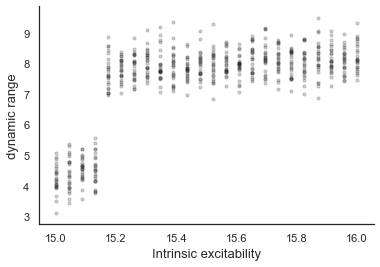

In [81]:
fig, axarr = plt.subplots(figsize = (6,4))
comb_k = []
comb_le = []
for e in range(len(vth_list)):
    plt.scatter(vth_vals,np.array(plot_me)[:,e], c = 'k', s = 10, alpha = 0.2)
    #comb_k = np.append(comb_k, k_vals)
    #comb_le = np.append(comb_le, np.mean(np.array(curr)[:,e], axis=1))
    
axarr.set_ylabel('dynamic range', size = '13')
axarr.set_xlabel('Intrinsic excitability', size = '13')
axarr.spines['top'].set_visible(False)
axarr.spines['right'].set_visible(False)
#plt.savefig(Ffig + 'dynrange_k.svg', transparent = True)
plt.show()

In [82]:
r_list = np.linspace(or_r, pre_r, 24)
r_vals = r_list
r_vals

array([7.        , 6.69565217, 6.39130435, 6.08695652, 5.7826087 ,
       5.47826087, 5.17391304, 4.86956522, 4.56521739, 4.26086957,
       3.95652174, 3.65217391, 3.34782609, 3.04347826, 2.73913043,
       2.43478261, 2.13043478, 1.82608696, 1.52173913, 1.2173913 ,
       0.91304348, 0.60869565, 0.30434783, 0.        ])

In [83]:
prac = sorted(glob.glob('*rrange*dynrange*'))
#curr = np.load(prac[0])


In [84]:
plot_me = list(range(len(r_list)))
for e in range(len(r_list)):
    plot_vec = []
    for i in range(50):
        plot_vec = np.append(plot_vec, np.load(prac[e], allow_pickle=True)[i][0][0])
    plot_me[e] = plot_vec

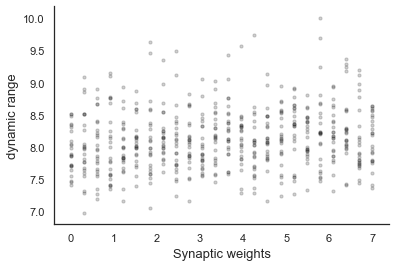

In [85]:
fig, axarr = plt.subplots(figsize = (6,4))
comb_k = []
comb_le = []
for e in range(len(r_list)):
    plt.scatter(r_vals,np.array(plot_me)[:,e], c = 'k', s = 10, alpha = 0.2)
    #comb_k = np.append(comb_k, k_vals)
    #comb_le = np.append(comb_le, np.mean(np.array(curr)[:,e], axis=1))
    
axarr.set_ylabel('dynamic range', size = '13')
axarr.set_xlabel('Synaptic weights', size = '13')
axarr.spines['top'].set_visible(False)
axarr.spines['right'].set_visible(False)
#plt.savefig(Ffig + 'dynrange_k.svg', transparent = True)
plt.show()

# Network mediated separation

In [94]:
# Node coordinates
#---------------------------------------------------------------------------
os.chdir(Fdata + 'PTZ-WILDTYPE')
bln = sorted(glob.glob('NMS*bln*'))
pre = sorted(glob.glob('NMS*pre*'))
sz = sorted(glob.glob('NMS*sz*'))

k = sorted(glob.glob('NMS*k*'))
vth = sorted(glob.glob('NMS*vth*'))
r = sorted(glob.glob('NMS*-r*'))
bln, pre, sz, k, vth, r

(['NMS-bln.npy'],
 ['NMS-pre.npy'],
 ['NMS-sz.npy'],
 ['NMS-k.npy'],
 ['NMS-vth.npy'],
 ['NMS-r.npy'])

In [95]:
diff_list = np.arange(5, 500, 10)
diff_list

array([  5,  15,  25,  35,  45,  55,  65,  75,  85,  95, 105, 115, 125,
       135, 145, 155, 165, 175, 185, 195, 205, 215, 225, 235, 245, 255,
       265, 275, 285, 295, 305, 315, 325, 335, 345, 355, 365, 375, 385,
       395, 405, 415, 425, 435, 445, 455, 465, 475, 485, 495])

In [ ]:
nms_list = list(range(len(k_list)))
count=0
for k in k_list:
    stim_time = 401
    nms = NMS(diff_list, sim_time, stim_time, 5, k, o_vth, o_r, s, divisor, soften, N, dist, v_rest, t_syn_del, tau_l, N_e, lam, w_e)

    nms_list[count] = nms
    count+=1
    np.save(savepath + 'model_krange_NMS-' + str(k) + '.npy', nms)
    print('Done ' + str(k))


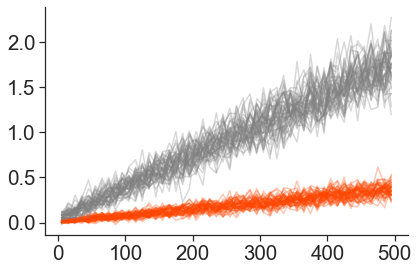

In [96]:
fig, axarr = plt.subplots(figsize = (6.5,4.2))  
comb_k = []
comb_le = []

data_list1 = np.load(bln[0])
#data_list2 = np.load(pre[0])
data_list2 = np.load(sz[0])
for e in range(len(diff_list)):
    plt.plot(diff_list,np.array(data_list1)[:,e],c='grey', alpha = 0.3)
    #plt.scatter(diff_list,np.array(data_list2)[:,e], c = 'teal', s = 10, alpha = 0.2)
    plt.plot(diff_list,np.array(data_list2)[:,e], c='orangered', alpha = 0.3)
    #plt.scatter(diff_list,np.array(data_listk)[:,e], c = 'green', s = 10, alpha = 0.2)

    #comb_k = np.append(comb_k, k_vals)
    #comb_le = np.append(comb_le, np.mean(np.array(curr)[:,e], axis=1))
    
#axarr.set_ylabel('NMS', size = '13')
#axarr.set_xlabel('distance input', size = '13')
axarr.spines['top'].set_visible(False)
axarr.spines['right'].set_visible(False)
plt.yticks(size = 20.5)
plt.xticks(size = 20.5, visible=True)
plt.tick_params(axis = "x", which = "both", bottom = True)
plt.tick_params(axis = "y", which = "both", left = True)
#plt.savefig(Ffig + 'NMS_compare.svg', transparent = True)
plt.show()

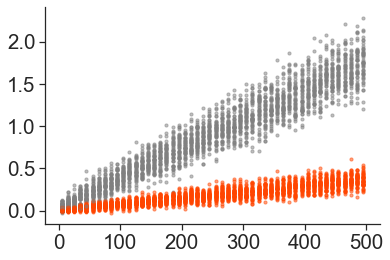

In [97]:
fig, axarr = plt.subplots(figsize = (6,4))
comb_k = []
comb_le = []

data_list1 = np.load(bln[0])
#data_list2 = np.load(pre[0])
data_list2 = np.load(sz[0])
for e in range(len(diff_list)):
    plt.scatter(diff_list,np.array(data_list1)[:,e], c = 'grey', s = 10, alpha = 0.5)
    #plt.scatter(diff_list,np.array(data_list2)[:,e], c = 'teal', s = 10, alpha = 0.2)
    plt.scatter(diff_list,np.array(data_list2)[:,e], c = 'orangered', s = 10, alpha = 0.5)
    #plt.scatter(diff_list,np.array(data_listk)[:,e], c = 'green', s = 10, alpha = 0.2)

    #comb_k = np.append(comb_k, k_vals)
    #comb_le = np.append(comb_le, np.mean(np.array(curr)[:,e], axis=1))
    
#axarr.set_ylabel('NMS', size = '13')
#axarr.set_xlabel('distance input', size = '13')
axarr.spines['top'].set_visible(False)
axarr.spines['right'].set_visible(False)
plt.yticks(size = 20.5)
plt.xticks(size = 20.5, visible=True)
plt.tick_params(axis = "x", which = "both", bottom = True)
plt.tick_params(axis = "y", which = "both", left = True)
#plt.savefig(Ffig + 'NMS_compare.svg', transparent = True)
plt.show()

In [99]:
import scipy.stats as stats
bln_nmsc = np.zeros(50)
data = np.array(np.load(bln[0]))
for i in range(50):
    bln_nmsc[i] = stats.linregress(diff_list, data[:,i])[0]
    
import scipy.stats
sz_nmsc = np.zeros(50)
data = np.array(np.load(sz[0]))

for i in range(50):
    sz_nmsc[i] = stats.linregress(diff_list, data[:,i])[0]
    
nmsc_list = bln_nmsc, sz_nmsc

In [100]:
import pandas as pd

import pandas as pd

data_list = nmsc_list
nmsc_v = list(range(100))
cond = list(range(100))

cond_list = ['BLN', 'GEN']
count=0
for i in range(len(data_list)):
    for x in range(len(data_list[i])):
        nmsc_v[count] = data_list[i][x]
        cond[count] = cond_list[i]
        count+=1
nmsc_df = pd.DataFrame({"nmsc":nmsc_v , "condition": cond})

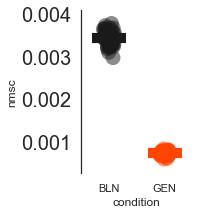

In [101]:
# from matplotlib.collections import PathCollection
from matplotlib import cm
sns.set(style="white")
colors = ['k', 'orangered', 'k', 'k']
colors1  = cm.Spectral_r(np.linspace(0,1,11))

fig, ax = plt.subplots(figsize = (2,3))
ax = sns.pointplot(x="condition", y="nmsc", data = nmsc_df, hue = 'condition', palette = colors, join=True, ci=0, scale=5, markers='_')
for artist in ax.lines:
    artist.set_zorder(10)
for artist in ax.findobj(PathCollection):
    artist.set_zorder(11)
#ax = sns.pointplot(x="Labels", y="Branching ratio", data = bdf, color = 'grey', linestyles = ["--"], ci = 0, scale=0.6)
ax = sns.stripplot(x="condition", y="nmsc", data = nmsc_df, hue = 'condition', palette = colors, size = 15, jitter = True ,alpha = 0.5)

plt.yticks(size = 20)
points = ax.collections
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
#ax.spines['left'].set_visible(False)

#ax.set_xlabel(' ', size = '13')
#ax.set_ylabel('σ', size = '15')
#ax.set_xticklabels(['Baseline', 'Ictal'], size = 15)
ax.legend_.remove()
#plt.savefig(Ffig + 'nmsc_compare_mod.svg', transparent = True)
plt.show()

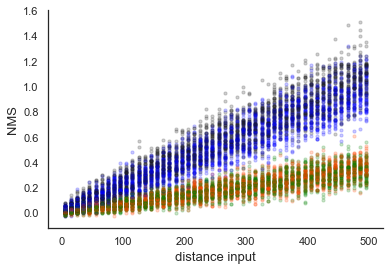

In [102]:
fig, axarr = plt.subplots(figsize = (6,4))
comb_k = []
comb_le = []

data_list1 = np.load(pre[0])
data_list2 = np.load(sz[0])

data_listk = np.load(k[0])
data_listvth = np.load(vth[0])
data_listr = np.load(r[0])

for e in range(len(diff_list)):
    plt.scatter(diff_list,np.array(data_list1)[:,e], c = 'k', s = 10, alpha = 0.2)
    plt.scatter(diff_list,np.array(data_list2)[:,e], c = 'orangered', s = 10, alpha = 0.2)
    plt.scatter(diff_list,np.array(data_listk)[:,e], c = 'green', s = 10, alpha = 0.2)
    plt.scatter(diff_list,np.array(data_listvth)[:,e], c = 'blue', s = 10, alpha = 0.2)
    #plt.scatter(diff_list,np.array(data_listr)[:,e], c = 'purple', s = 10, alpha = 0.2)


    #comb_k = np.append(comb_k, k_vals)
    #comb_le = np.append(comb_le, np.mean(np.array(curr)[:,e], axis=1))
    
axarr.set_ylabel('NMS', size = '13')
axarr.set_xlabel('distance input', size = '13')
axarr.spines['top'].set_visible(False)
axarr.spines['right'].set_visible(False)
#plt.savefig(Ffig + 'dynrange_k.svg', transparent = True)
plt.show()

In [104]:
data_list = np.load(bln[0]),np.load(sz[0]),np.load(k[0]), np.load(vth[0]), np.load(r[0])

In [105]:
import pandas as pd

import pandas as pd

nms_v = list(range(250))
cond = list(range(250))

cond_list = ['BLN', 'GEN', 'K', 'VTH', 'R']
count=0
for i in range(len(data_list)):
    for x in range(len(data_list[i])):
        nms_v[count] = np.mean(data_list[i][:,x])
        cond[count] = cond_list[i]
        count+=1
nms_df = pd.DataFrame({"nms":nms_v , "condition": cond})

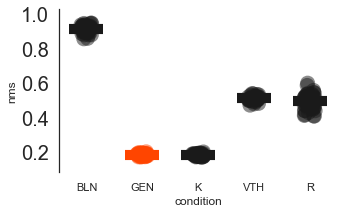

In [106]:

from matplotlib.collections import PathCollection
from matplotlib import cm
sns.set(style="white")
colors = ['k', 'orangered', 'k', 'k']
colors1  = cm.Spectral_r(np.linspace(0,1,11))

fig, ax = plt.subplots(figsize = (5,3))
ax = sns.pointplot(x="condition", y="nms", data = nms_df, hue = 'condition', palette = colors, join=True, ci=0, scale=5, markers='_')
for artist in ax.lines:
    artist.set_zorder(10)
for artist in ax.findobj(PathCollection):
    artist.set_zorder(11)
#ax = sns.pointplot(x="Labels", y="Branching ratio", data = bdf, color = 'grey', linestyles = ["--"], ci = 0, scale=0.6)
ax = sns.stripplot(x="condition", y="nms", data = nms_df, hue = 'condition', palette = colors, size = 15, jitter = True ,alpha = 0.5)

plt.yticks(size = 20)
points = ax.collections
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
#ax.spines['left'].set_visible(False)

#ax.set_xlabel(' ', size = '13')
#ax.set_ylabel('σ', size = '15')
#ax.set_xticklabels(['Baseline', 'Ictal'], size = 15)
ax.legend_.remove()
#plt.savefig(Ffig + 'nms_compare_mod.svg', transparent = True)
plt.show()

In [107]:
prac = sorted(glob.glob('*krange_NMS*'))
prac

['model_krange_NMS-06.npy',
 'model_krange_NMS-07.npy',
 'model_krange_NMS-08.npy',
 'model_krange_NMS-09.npy',
 'model_krange_NMS-10.npy',
 'model_krange_NMS-11.npy',
 'model_krange_NMS-12.npy',
 'model_krange_NMS-13.npy',
 'model_krange_NMS-14.npy',
 'model_krange_NMS-15.npy',
 'model_krange_NMS-16.npy',
 'model_krange_NMS-17.npy',
 'model_krange_NMS-18.npy',
 'model_krange_NMS-19.npy',
 'model_krange_NMS-20.npy',
 'model_krange_NMS-21.npy',
 'model_krange_NMS-22.npy',
 'model_krange_NMS-23.npy',
 'model_krange_NMS-24.npy',
 'model_krange_NMS-25.npy',
 'model_krange_NMS-26.npy',
 'model_krange_NMS-27.npy',
 'model_krange_NMS-28.npy',
 'model_krange_NMS-29.npy',
 'model_krange_NMS-30.npy']

In [114]:
k_list = np.arange(6, 31)
k_vals = ((k_list*2) / 8990) *100
k_vals

array([0.13348165, 0.15572859, 0.17797553, 0.20022247, 0.22246941,
       0.24471635, 0.26696329, 0.28921023, 0.31145717, 0.33370412,
       0.35595106, 0.378198  , 0.40044494, 0.42269188, 0.44493882,
       0.46718576, 0.4894327 , 0.51167964, 0.53392659, 0.55617353,
       0.57842047, 0.60066741, 0.62291435, 0.64516129, 0.66740823])

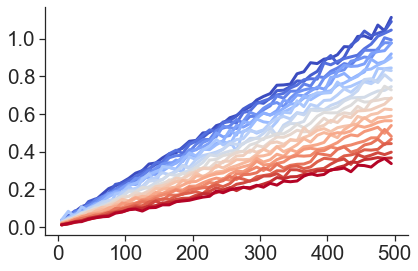

In [108]:
fig, axarr = plt.subplots(figsize = (6.5,4.2))  

axarr.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
colors  = cm.coolwarm(np.linspace(0,1,len(prac)))

comb_nms = list(range(25))
comb_nmsc = list(range(25))


for x in range(25):
    curr =  np.mean(np.load(prac[x]), axis=1)
    plt.plot(diff_list, curr, c=colors[x], alpha = 1, linewidth = 3)
    
axarr.spines['top'].set_visible(False)
axarr.spines['right'].set_visible(False)
plt.yticks(size = 20.5)
plt.xticks(size = 20.5, visible=True)
plt.tick_params(axis = "x", which = "both", bottom = True)
plt.tick_params(axis = "y", which = "both", left = True)
#plt.savefig(Ffig + 'NMS_k.svg', transparent = True)
plt.show()

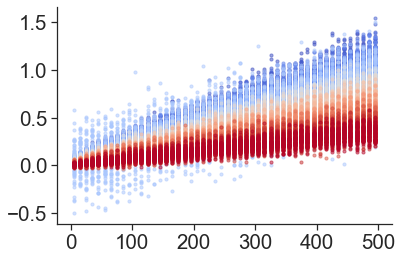

In [109]:
fig, axarr = plt.subplots(figsize = (6,4))
colors  = cm.coolwarm(np.linspace(0,1,len(prac)))

comb_nms = list(range(25))
comb_nmsc = list(range(25))


for x in range(25):
    curr = np.load(prac[x])
    curr_nms = list(range(50))
    curr_nmsc = list(range(50))

    for e in range(50):
        plt.scatter(diff_list,curr[:,e], c = [colors[x]] , s = 10, alpha = 0.5)
        curr_nms[e] = np.mean(curr[:,e])
        curr_nmsc[e] = stats.linregress(diff_list, curr[:,e])[0]
    comb_nms[x] = curr_nms
    comb_nmsc[x] = curr_nmsc


axarr.spines['top'].set_visible(False)
axarr.spines['right'].set_visible(False)
plt.yticks(size = 20.5)
plt.xticks(size = 20.5, visible=True)
plt.tick_params(axis = "x", which = "both", bottom = True)
plt.tick_params(axis = "y", which = "both", left = True)
#plt.savefig(Ffig + 'NMS_k.svg', transparent = True)
plt.show()

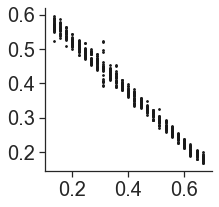

In [115]:
fig, axarr = plt.subplots(figsize = (3,3))
comb_k = []
combined_nms = []
for e in range(len(k_list)):
    plt.scatter(k_vals,np.array(comb_nms)[:,e], c = 'k', s = 3, alpha = 1)
    comb_k = np.append(comb_k, k_vals)
    combined_nms = np.append(combined_nms, np.array(comb_nms)[:,e])

#axarr.set_ylabel('mean NMS', size = '13')
#axarr.set_xlabel('Edge density (%)', size = '13')
plt.yticks(size = 20)
plt.xticks(size = 20)

points = ax.collections
axarr.spines['top'].set_visible(False)
axarr.spines['right'].set_visible(False)
plt.tick_params(axis = "x", which = "both", bottom = True)
plt.tick_params(axis = "y", which = "both", left = True)
#plt.savefig(Ffig + 'dynrange_k.svg', transparent = True
#plt.savefig(Ffig + 'NMS_model_k.svg', transparent = True)

plt.show()

In [116]:
import scipy.stats
stats.pearsonr(comb_k, combined_nms)

(-0.9938206713512321, 0.0)

# Lyapunov Exponent

In [ ]:
datalist = list(range(6))
klist, vthlist, rlist = [bln_k, pre_k, sz_k, o_k, ov_k, or_k],[bln_vth, pre_vth, sz_vth, o_vth, ov_vth, or_vth],[bln_r, pre_r, sz_r, o_r, ov_r, or_r]
for e in range(6):
    curr_list = list(range(50))
    for i in range(50):
        stim_time = 401
        le = run_LE(sim_time, stim_time, klist[e], vthlist[e], rlist[e], s, divisor, soften, N, dist, v_rest, t_syn_del, tau_l, N_e, lam, w_e)
        curr_list[i] = le
        
    datalist[e] = curr_list
    print('Done ' + str(e))
np.save(savepath + 'model_LE.npy', datalist)

In [23]:
os.chdir(Fdata + 'PTZ-WILDTYPE')
datalist = sorted(glob.glob('model_LE.*'))
data = np.load(datalist[0], allow_pickle=True)


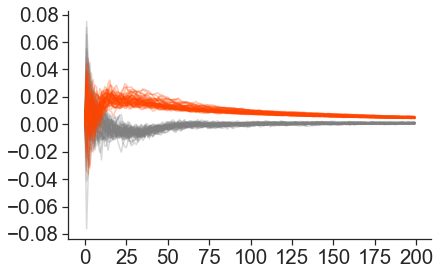

In [24]:
#VISUALISE LE in spontaneous vs seizure network
fig, axarr = plt.subplots(figsize = (6.5,4.2))  

stop = 200
for x in range(len(data[0])):
    plt.plot(data[0][x][:stop], c='grey', alpha = 0.3)


for x in range(len(data[2])):
    plt.plot(data[2][x][:stop], c='orangered', alpha = 0.3)

axarr.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())

#plt.xlim(right = 1000000)  
#plt.ylim(bottom = 0.000003)  
axarr.spines['top'].set_visible(False)
axarr.spines['right'].set_visible(False)
plt.yticks(size = 20.5)
plt.xticks(size = 20.5, visible=True)
plt.tick_params(axis = "x", which = "both", bottom = True)
plt.tick_params(axis = "y", which = "both", left = True)
plt.savefig(Ffig + 'LE_model.svg', transparent = True)
plt.show()

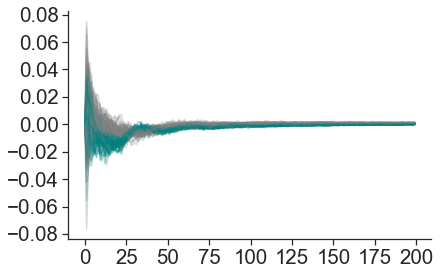

In [61]:
#VISUALISE LE in spontaneous vs preseizure network
fig, axarr = plt.subplots(figsize = (6.5,4.2))  

stop = 200
for x in range(len(data[0])):
    plt.plot(data[0][x][:stop], c='grey', alpha = 0.3) #Spontaneous
    plt.plot(data[1][x][:stop], c='teal', alpha = 0.3) #Preseizure
    #plt.plot(data[0][x][:stop], c='grey', alpha = 0.3)
    #plt.plot(data[0][x][:stop], c='grey', alpha = 0.3)
    #plt.plot(data[0][x][:stop], c='grey', alpha = 0.3)


axarr.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())

#plt.xlim(right = 1000000)  
#plt.ylim(bottom = 0.000003)  
axarr.spines['top'].set_visible(False)
axarr.spines['right'].set_visible(False)
plt.yticks(size = 20.5)
plt.xticks(size = 20.5, visible=True)
plt.tick_params(axis = "x", which = "both", bottom = True)
plt.tick_params(axis = "y", which = "both", left = True)
plt.show()

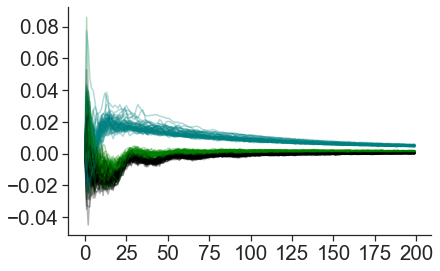

In [64]:
#VISUALISE LE in all single param networks
fig, axarr = plt.subplots(figsize = (6.5,4.2))  

stop = 200
for x in range(len(data[0])):
    plt.plot(data[3][x][:stop], c='teal', alpha = 0.3) #K
    plt.plot(data[4][x][:stop], c='black', alpha = 0.3) #VTH
    plt.plot(data[5][x][:stop], c='green', alpha = 0.3) #R


axarr.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())

#plt.xlim(right = 1000000)  
#plt.ylim(bottom = 0.000003)  
axarr.spines['top'].set_visible(False)
axarr.spines['right'].set_visible(False)
plt.yticks(size = 20.5)
plt.xticks(size = 20.5, visible=True)
plt.tick_params(axis = "x", which = "both", bottom = True)
plt.tick_params(axis = "y", which = "both", left = True)
plt.show()

In [25]:
#BRANCH RATIO
import pandas as pd

import pandas as pd

le_v = list(range(100))
cond = list(range(100))

cond_list = ['BLN', 'PRE', 'GEN', 'K', 'VTH', 'R']
count=0
for i in range(len(data)):
    if i == 0 or i == 2:
        for x in range(len(data[i])):
            le_v[count] = np.mean(data[i][x])
            cond[count] = cond_list[i]
            count+=1
le_df = pd.DataFrame({"Lyapunov exponent":le_v , "condition": cond})




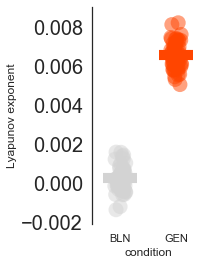

In [26]:

from matplotlib.collections import PathCollection
from matplotlib import cm
sns.set(style="white")
colors = ['lightgrey', 'orangered']
colors1  = cm.Spectral_r(np.linspace(0,1,11))

fig, ax = plt.subplots(figsize = (2,4))
ax = sns.pointplot(x="condition", y="Lyapunov exponent", data = le_df, hue = 'condition', palette = colors, join=True, ci=0, scale=5, markers='_')
for artist in ax.lines:
    artist.set_zorder(10)
for artist in ax.findobj(PathCollection):
    artist.set_zorder(11)
#ax = sns.pointplot(x="Labels", y="Branching ratio", data = bdf, color = 'grey', linestyles = ["--"], ci = 0, scale=0.6)
ax = sns.stripplot(x="condition", y="Lyapunov exponent", data = le_df, hue = 'condition', palette = colors, size = 15, jitter = True ,alpha = 0.5)

plt.yticks(size = 20)
points = ax.collections
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)

#ax.set_xlabel(' ', size = '13')
#ax.set_ylabel('σ', size = '15')
#ax.set_xticklabels(['Baseline', 'Ictal'], size = 15)
ax.legend_.remove()
plt.savefig(Ffig + 'LE_compare_mod.svg', transparent = True)
plt.show()

In [7]:
os.chdir(Fdata + 'PTZ-WILDTYPE')
datalist = sorted(glob.glob('model_LE.*'))
datalist

['model_LE.npy']

In [17]:
import pandas as pd

import pandas as pd

le_v = list(range(250))
cond = list(range(250))

cond_list = ['BLN', 'PRE', 'GEN', 'K', 'VTH', 'R']
count=0
data = np.load(datalist[0], allow_pickle=True)
for i in range(len(data)):
    if i !=1:
        for x in range(len(data[i])):
            le_v[count] = np.mean(data[i][x])
            cond[count] = cond_list[i]
            count+=1
le_df = pd.DataFrame({"Lyapunov exponent":le_v , "condition": cond})




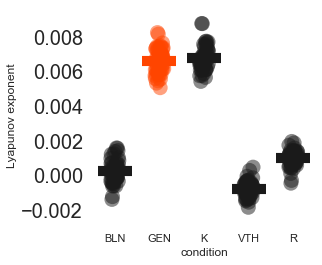

In [18]:

from matplotlib.collections import PathCollection
from matplotlib import cm
sns.set(style="white")
colors = ['k', 'orangered', 'k', 'k']
colors1  = cm.Spectral_r(np.linspace(0,1,11))

fig, ax = plt.subplots(figsize = (4,4))
ax = sns.pointplot(x="condition", y="Lyapunov exponent", data = le_df, hue = 'condition', palette = colors, join=True, ci=0, scale=5, markers='_')
for artist in ax.lines:
    artist.set_zorder(10)
for artist in ax.findobj(PathCollection):
    artist.set_zorder(11)
#ax = sns.pointplot(x="Labels", y="Branching ratio", data = bdf, color = 'grey', linestyles = ["--"], ci = 0, scale=0.6)
ax = sns.stripplot(x="condition", y="Lyapunov exponent", data = le_df, hue = 'condition', palette = colors, size = 15, jitter = True ,alpha = 0.5)

plt.yticks(size = 20)
points = ax.collections
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

#ax.set_xlabel(' ', size = '13')
#ax.set_ylabel('σ', size = '15')
#ax.set_xticklabels(['Baseline', 'Ictal'], size = 15)
ax.legend_.remove()
plt.savefig(Ffig + 'LE_compare_mod.svg', transparent = True)
plt.show()

In [35]:
prac = sorted(glob.glob('*krange_LE*'))
curr = np.load(prac[0])
prac

['model_krange_LE.npy']

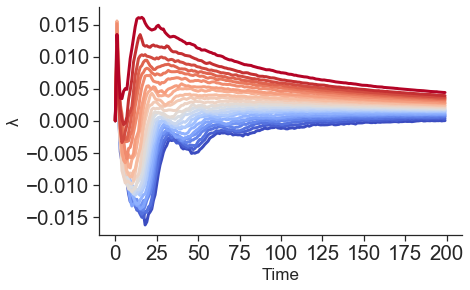

In [28]:
#PLOT LE as a function of k


fig, axarr = plt.subplots(figsize = (6.5,4.2))  

stop = 200

axarr.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())



colors  = cm.coolwarm(np.linspace(0,1,24))

for x in range(24):
    curr = np.mean(np.load(prac[0])[x], axis=0)
    plt.plot(curr[:stop], c=colors[x], alpha = 1, linewidth = 3)

#plt.plot(bln_mean[:stop], '-', linewidth = '3', markersize = 1, alpha = 1, color = 'k')
#plt.plot(sz_mean[:stop],'-', linewidth = '3', markersize = 1, alpha = 1, color = 'firebrick')

#plt.xlim(right = 1000000)  
#plt.ylim(bottom = 0.000003)  
axarr.set_ylabel('λ', size = '17')
axarr.set_xlabel('Time', size = '17')
axarr.spines['top'].set_visible(False)
axarr.spines['right'].set_visible(False)
plt.yticks(size = 20.5)
plt.xticks(size = 20.5, visible=True)
plt.tick_params(axis = "x", which = "both", bottom = True)
plt.tick_params(axis = "y", which = "both", left = True)
#plt.savefig(Ffig + 'LE_model_params.svg', transparent = True)
plt.show()

In [40]:
k_list = np.arange(6, 30)
k_vals = ((k_list*2) / 8990) *100
k_vals

array([0.13348165, 0.15572859, 0.17797553, 0.20022247, 0.22246941,
       0.24471635, 0.26696329, 0.28921023, 0.31145717, 0.33370412,
       0.35595106, 0.378198  , 0.40044494, 0.42269188, 0.44493882,
       0.46718576, 0.4894327 , 0.51167964, 0.53392659, 0.55617353,
       0.57842047, 0.60066741, 0.62291435, 0.64516129])

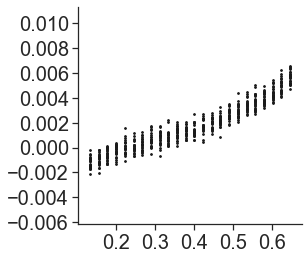

In [41]:
fig, ax = plt.subplots(figsize = (4,4))
comb_k = []
comb_le = []
for e in range(len(k_list)):
    plt.scatter(k_vals,np.mean(np.array(curr)[:,e],axis=1), c = 'k', s = 3, alpha = 1)
    comb_k = np.append(comb_k, k_vals)
    comb_le = np.append(comb_le, np.mean(np.array(curr)[:,e], axis=1))
    
plt.yticks(size = 20)
plt.xticks(size = 20)

points = ax.collections
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
#ax.spines['bottom'].set_visible(False)
#ax.spines['left'].set_visible(False)

#ax.set_xlabel(' ', size = '13')
#ax.set_ylabel('σ', size = '15')
#ax.set_xticklabels(['Baseline', 'Ictal'], size = 15)
#ax.legend_.remove()
plt.tick_params(axis = "x", which = "both", bottom = True)
plt.tick_params(axis = "y", which = "both", left = True)
plt.savefig(Ffig + 'LE_model_k_m.svg', transparent = True)

plt.show()

In [44]:

import scipy.stats
scipy.stats.pearsonr(comb_k, comb_le)

(0.9537629415995675, 7.502260166640157e-302)

In [45]:
vth_list = np.linspace(ov_vth, pre_vth, 24)[::-1]
vth_vals = vth_list

In [46]:
prac = sorted(glob.glob('*vthrange_LE*'))
curr = np.load(prac[0])
prac

['model_vthrange_LE.npy']

In [ ]:
le_list = list(range(len(vth_list)))
count=0
for vth in vth_list:
    curr = list(range(50))
    for x in range(50):
        stim_time = 401
        le = run_LE(sim_time, stim_time, ov_k, vth, ov_r, s, divisor, soften, N, dist, v_rest, t_syn_del, tau_l, N_e, lam, w_e)
        curr[x] = le
        
    le_list[count] = curr
    count+=1
    print('Done ' + str(k))
np.save(savepath + 'model_vthrange_LE.npy', le_list)

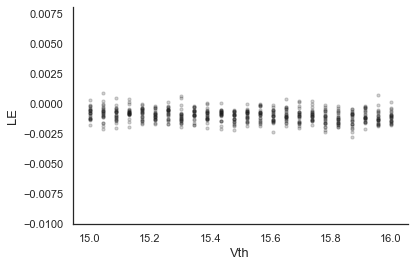

In [47]:
fig, axarr = plt.subplots(figsize = (6,4))
comb_vth = []
comb_le = []
for e in range(len(vth_list)):
    plt.scatter(vth_vals,np.mean(np.array(curr)[:,e],axis=1), c = 'k', s = 10, alpha = 0.2)
    comb_vth = np.append(comb_vth, vth_vals)
    comb_le = np.append(comb_le, np.mean(np.array(curr)[:,e], axis=1))
    
axarr.set_ylabel('LE', size = '13')
axarr.set_xlabel('Vth', size = '13')
axarr.spines['top'].set_visible(False)
axarr.spines['right'].set_visible(False)
#plt.savefig(Ffig + 'dynrange_k.svg', transparent = True)
plt.show()

In [49]:
import scipy.stats
scipy.stats.pearsonr(comb_vth, comb_le)

(-0.23097410340954516, 2.054690987840876e-08)

In [51]:
prac = sorted(glob.glob('*rrange_LE*'))
curr = np.load(prac[0])
prac

['model_rrange_LE.npy']

In [50]:
r_list = np.linspace(or_r, pre_r, 24)
r_vals = r_list
r_vals

array([7.        , 6.69565217, 6.39130435, 6.08695652, 5.7826087 ,
       5.47826087, 5.17391304, 4.86956522, 4.56521739, 4.26086957,
       3.95652174, 3.65217391, 3.34782609, 3.04347826, 2.73913043,
       2.43478261, 2.13043478, 1.82608696, 1.52173913, 1.2173913 ,
       0.91304348, 0.60869565, 0.30434783, 0.        ])

In [ ]:
le_list = list(range(len(r_list)))
count=0
for r in r_list:
    curr = list(range(50))
    for x in range(50):
        stim_time = 401
        le = run_LE(sim_time, stim_time, or_k, or_vth, r, s, divisor, soften, N, dist, v_rest, t_syn_del, tau_l, N_e, lam, w_e)
        curr[x] = le
        
    le_list[count] = curr
    count+=1
    print('Done ' + str(r))
np.save(savepath + 'model_rrange_LE.npy', le_list)

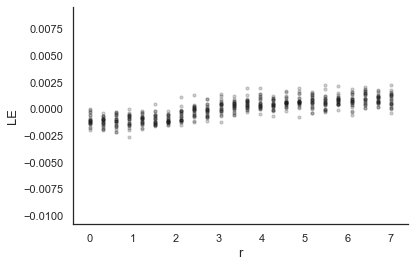

In [52]:
fig, axarr = plt.subplots(figsize = (6,4))
comb_r = []
comb_le = []
for e in range(len(r_list)):
    plt.scatter(r_vals,np.mean(np.array(curr)[:,e],axis=1), c = 'k', s = 10, alpha = 0.2)
    comb_r = np.append(comb_r, r_vals)
    comb_le = np.append(comb_le, np.mean(np.array(curr)[:,e], axis=1))
    
axarr.set_ylabel('LE', size = '13')
axarr.set_xlabel('r', size = '13')
axarr.spines['top'].set_visible(False)
axarr.spines['right'].set_visible(False)
#plt.savefig(Ffig + 'dynrange_k.svg', transparent = True)
plt.show()

In [54]:
import scipy.stats
scipy.stats.pearsonr(comb_r, comb_le)

(0.8005768711187592, 9.061392653526177e-130)